In [2]:
# Answer 1
# this is a classification problem, and not regression. the reason is 1) the output is numerical (it does not change, 
# not continuous), and 2) the output is binary.

In [3]:
#lets first import some libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#step 1
data = pd.read_csv('data_hw2.csv') #I renamed the file bc there was a previous dataset from labs/practices w/ the same name
data.head()[:5]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()
#answering the questions:
#1. there are a total of 303 observations
#2. there are no missing values, all the columns below state that they have 303 non-null values
#next two questions answered below.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
for variable in data.columns:
    print(f'The unique values for {variable}:\n {data[variable].value_counts()}\n ')
    
#age: it varies a lot, and age is a numerical value, so continuous
#sex: pretty obvious, it is male/female so I will take it as categorical
#cp: as its name suggests (chest pain type), it is a type, and not continuous variable. I will take this as categorical as well.
#trtbps: it is blood pressure, so varies a lot. thus continuous and numerical.
#chol: it seems to vary, and since the chol levels are numerical, I will assume this is a continuous variable
#fbs: since it is binary, I will take it as categorical.
#thalachh: it varies a lot and is numerical, so this should be continuous.
#restecg: since it is a result, I assume that this contains different types of conditions, so I will take this as categorical as well.
#exng: binary, so categorical
#oldpeak: it is a float, so it should be continuos.
#slp: I will take this as categorical as well, bc it seems to be not continuous
#caa: I will take this as categorical as well, because the range is so small.
#thall: categorical and the reason is same with caa.
#output: binary, so categorical

The unique values for age:
 age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64
 
The unique values for sex:
 sex
1    207
0     96
Name: count, dtype: int64
 
The unique values for cp:
 cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
 
The unique values for trtbps:
 trtbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
1

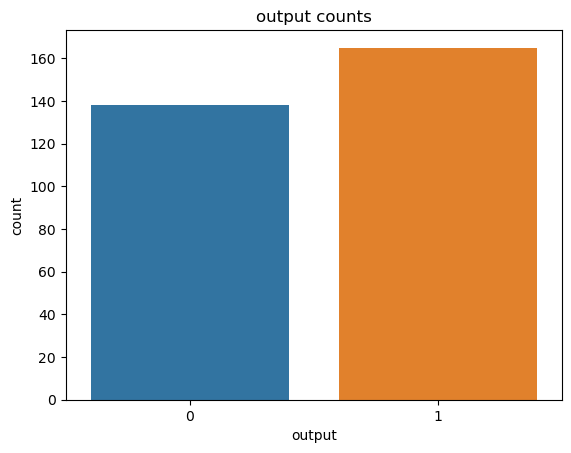

In [7]:
sns.countplot(x=data['output'])
plt.title('output counts')
plt.show()

#1. this dataset is not balanced, there are more people that are prone to heart attack.
#2. yes, it is important to work with a balanced dataset in order to obtain unbiased results.
#3. we can balance the data by including less observations from the majority group.

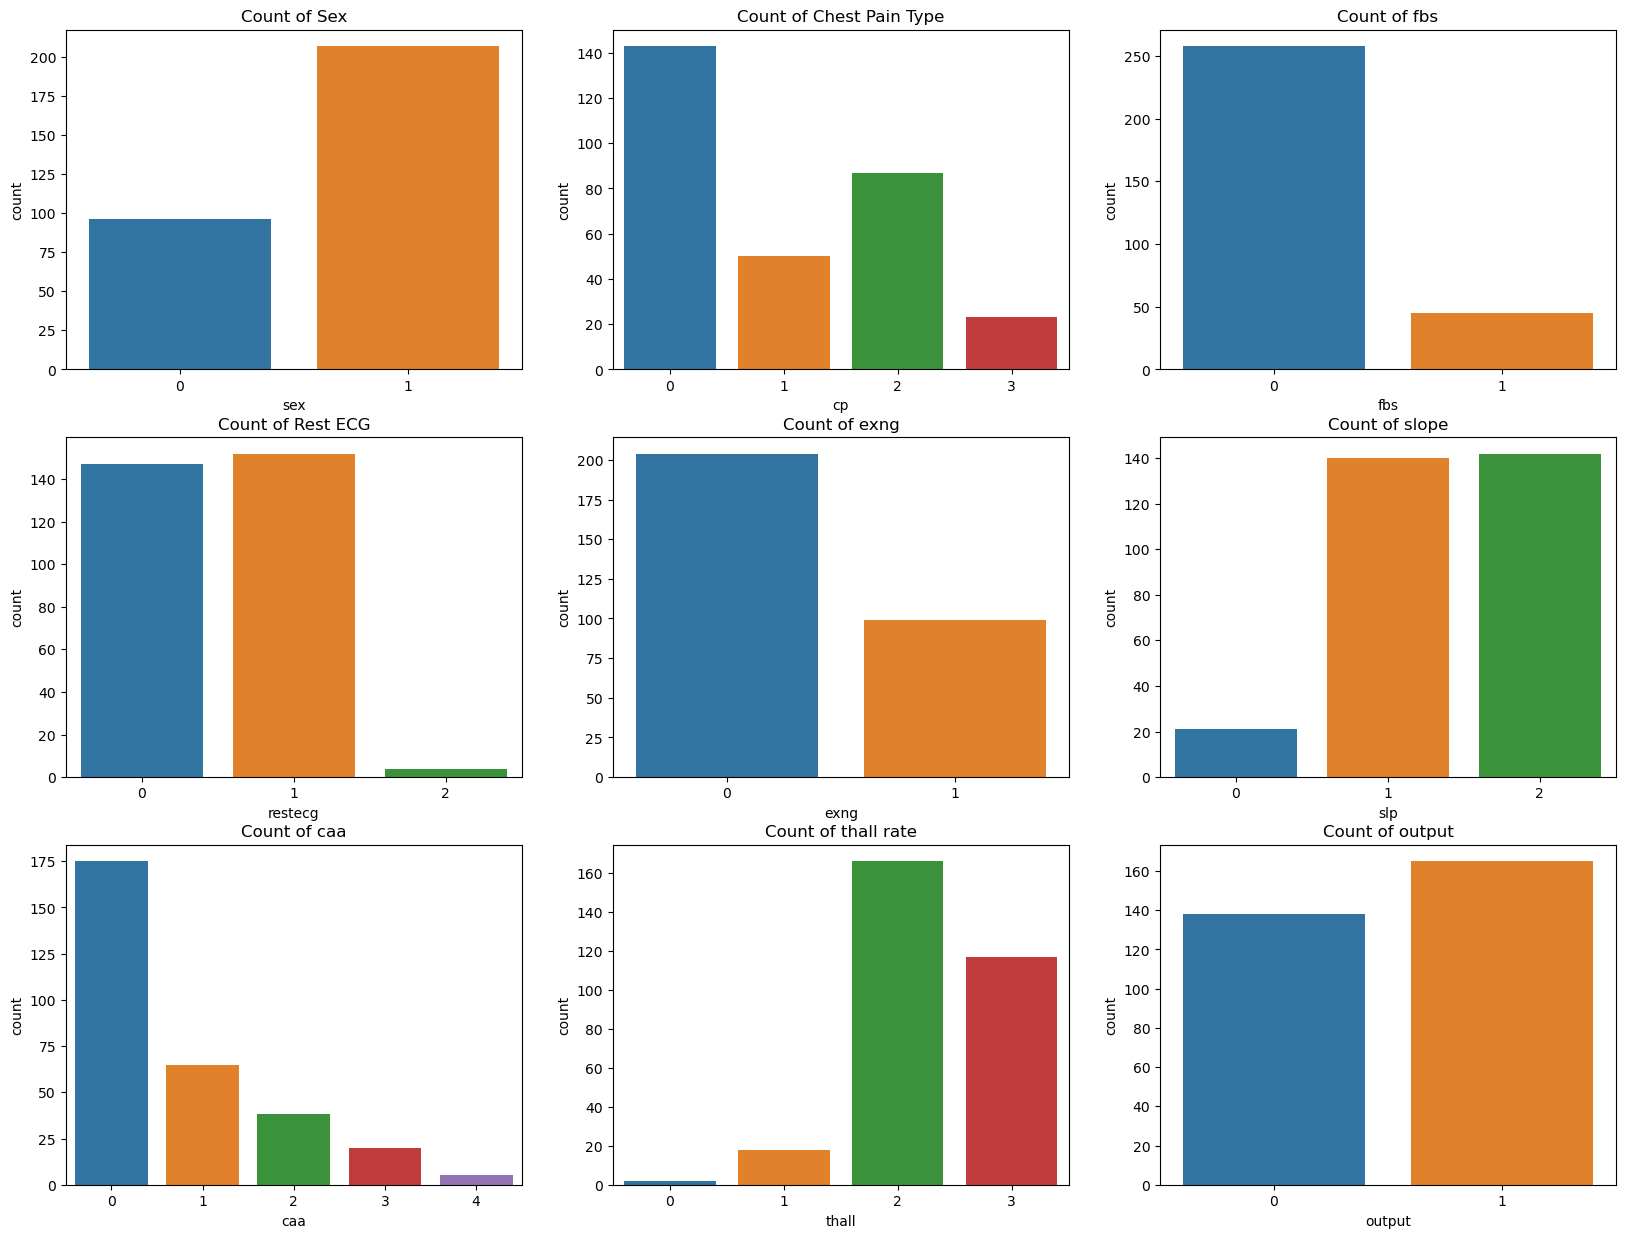

In [8]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(20,15))

sns.countplot(x=data['sex'],ax=axes[0][0])
axes[0][0].set_title('Count of Sex')

sns.countplot(x=data['cp'],ax=axes[0][1])
axes[0][1].set_title('Count of Chest Pain Type')

sns.countplot(x=data['fbs'],ax=axes[0][2])
axes[0][2].set_title('Count of fbs')

sns.countplot(x=data['restecg'],ax=axes[1][0])
axes[1][0].set_title('Count of Rest ECG')

sns.countplot(x=data['exng'],ax=axes[1][1])
axes[1][1].set_title('Count of exng')

sns.countplot(x=data['slp'],ax=axes[1][2])
axes[1][2].set_title('Count of slope')

sns.countplot(x=data['caa'],ax=axes[2][0])
axes[2][0].set_title('Count of caa')

sns.countplot(x=data['thall'],ax=axes[2][1])
axes[2][1].set_title('Count of thall rate')

sns.countplot(x=data['output'],ax=axes[2][2])
axes[2][2].set_title('Count of output')


plt.show()

#I can see that some variables vary a lot, like the fasting blood sugar. 0 is way more higher than 1.
#also count of major vessels 0 is much higher than the others.

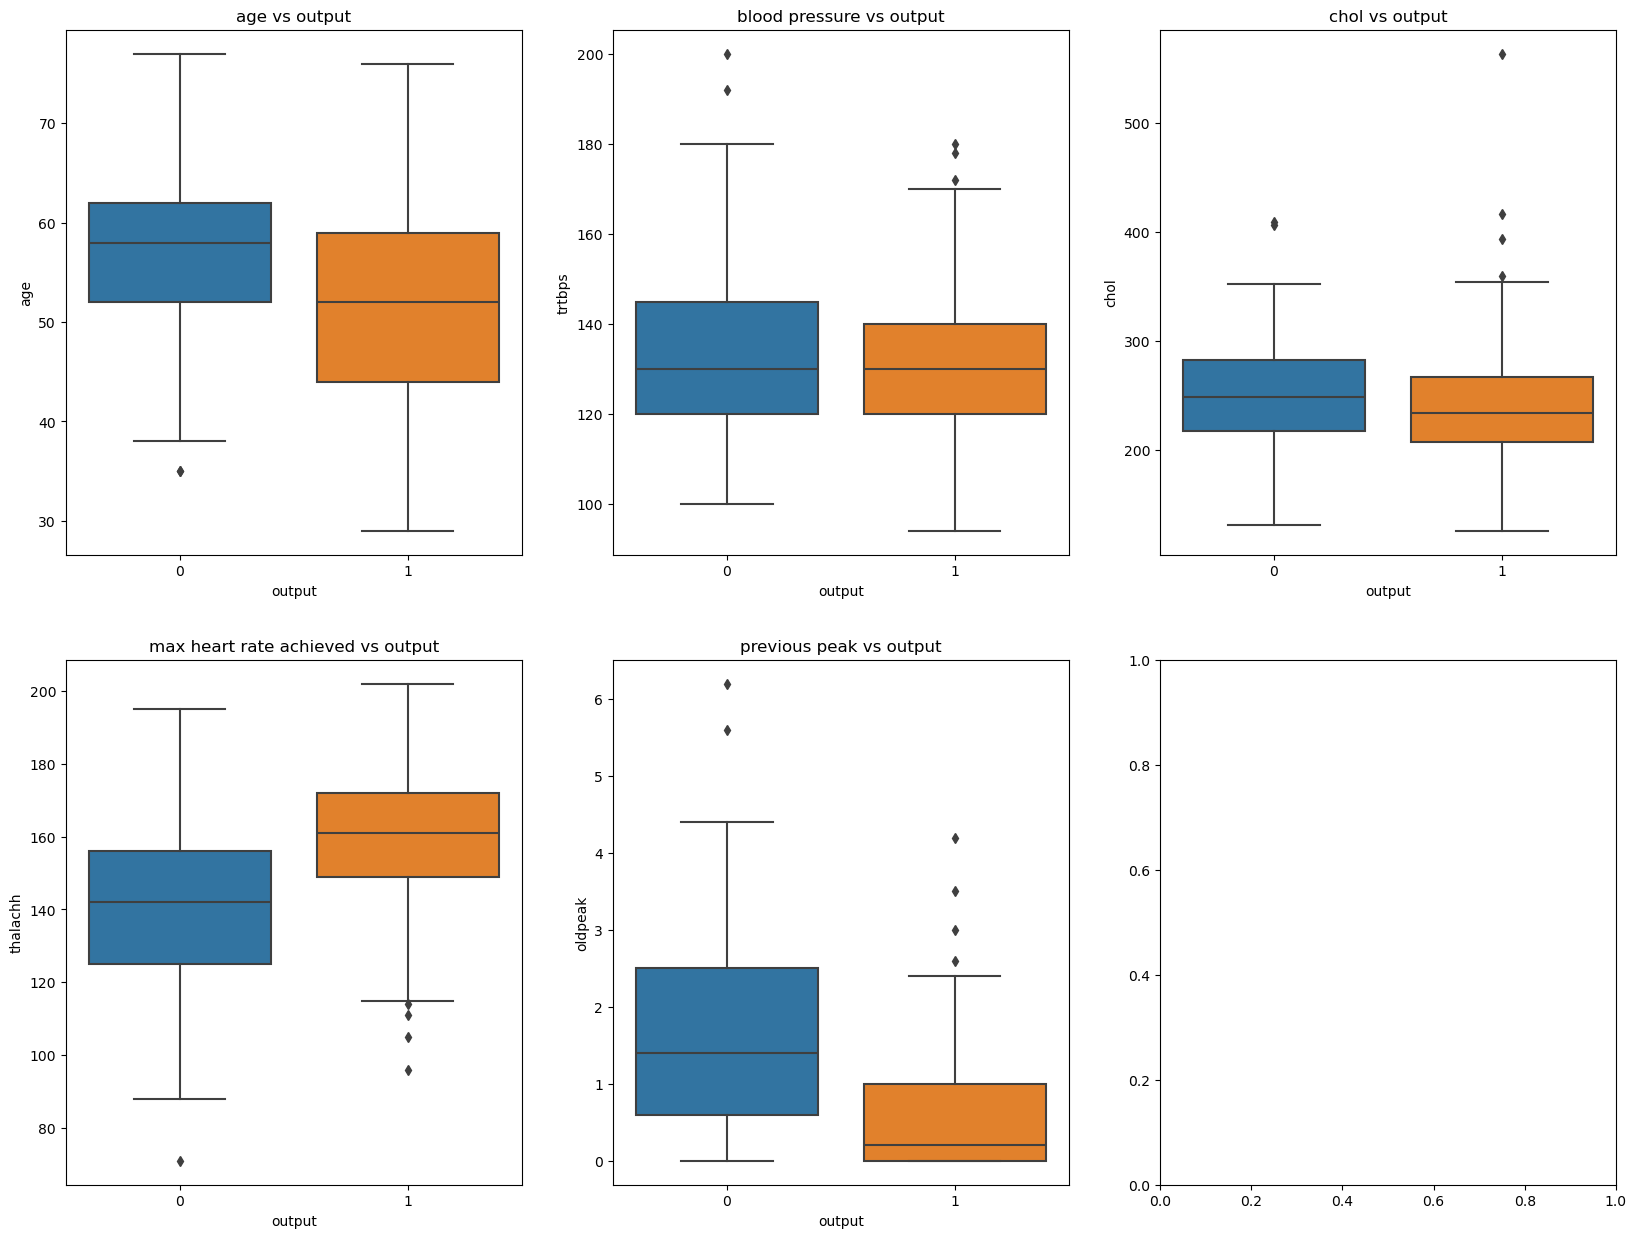

In [9]:
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(20,15))

sns.boxplot(x='output',y='age',data=data,ax=axes[0][0])
axes[0][0].set_title('age vs output')

sns.boxplot(x='output',y='trtbps',data=data,ax=axes[0][1])
axes[0][1].set_title('blood pressure vs output')

sns.boxplot(x='output',y='chol',data=data,ax=axes[0][2])
axes[0][2].set_title('chol vs output')

sns.boxplot(x='output',y='thalachh',data=data,ax=axes[1][0])
axes[1][0].set_title('max heart rate achieved vs output')

sns.boxplot(x='output',y='oldpeak',data=data,ax=axes[1][1])
axes[1][1].set_title('previous peak vs output')

plt.show()

#there are some outliers in some variables. in cholestrol, blood pressure and oldpeak. but I was surprised to see that
#cholestrol did not effect proneness to heart attack that much. I would expect it to affect more. same goes with
#blood pressure as well.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

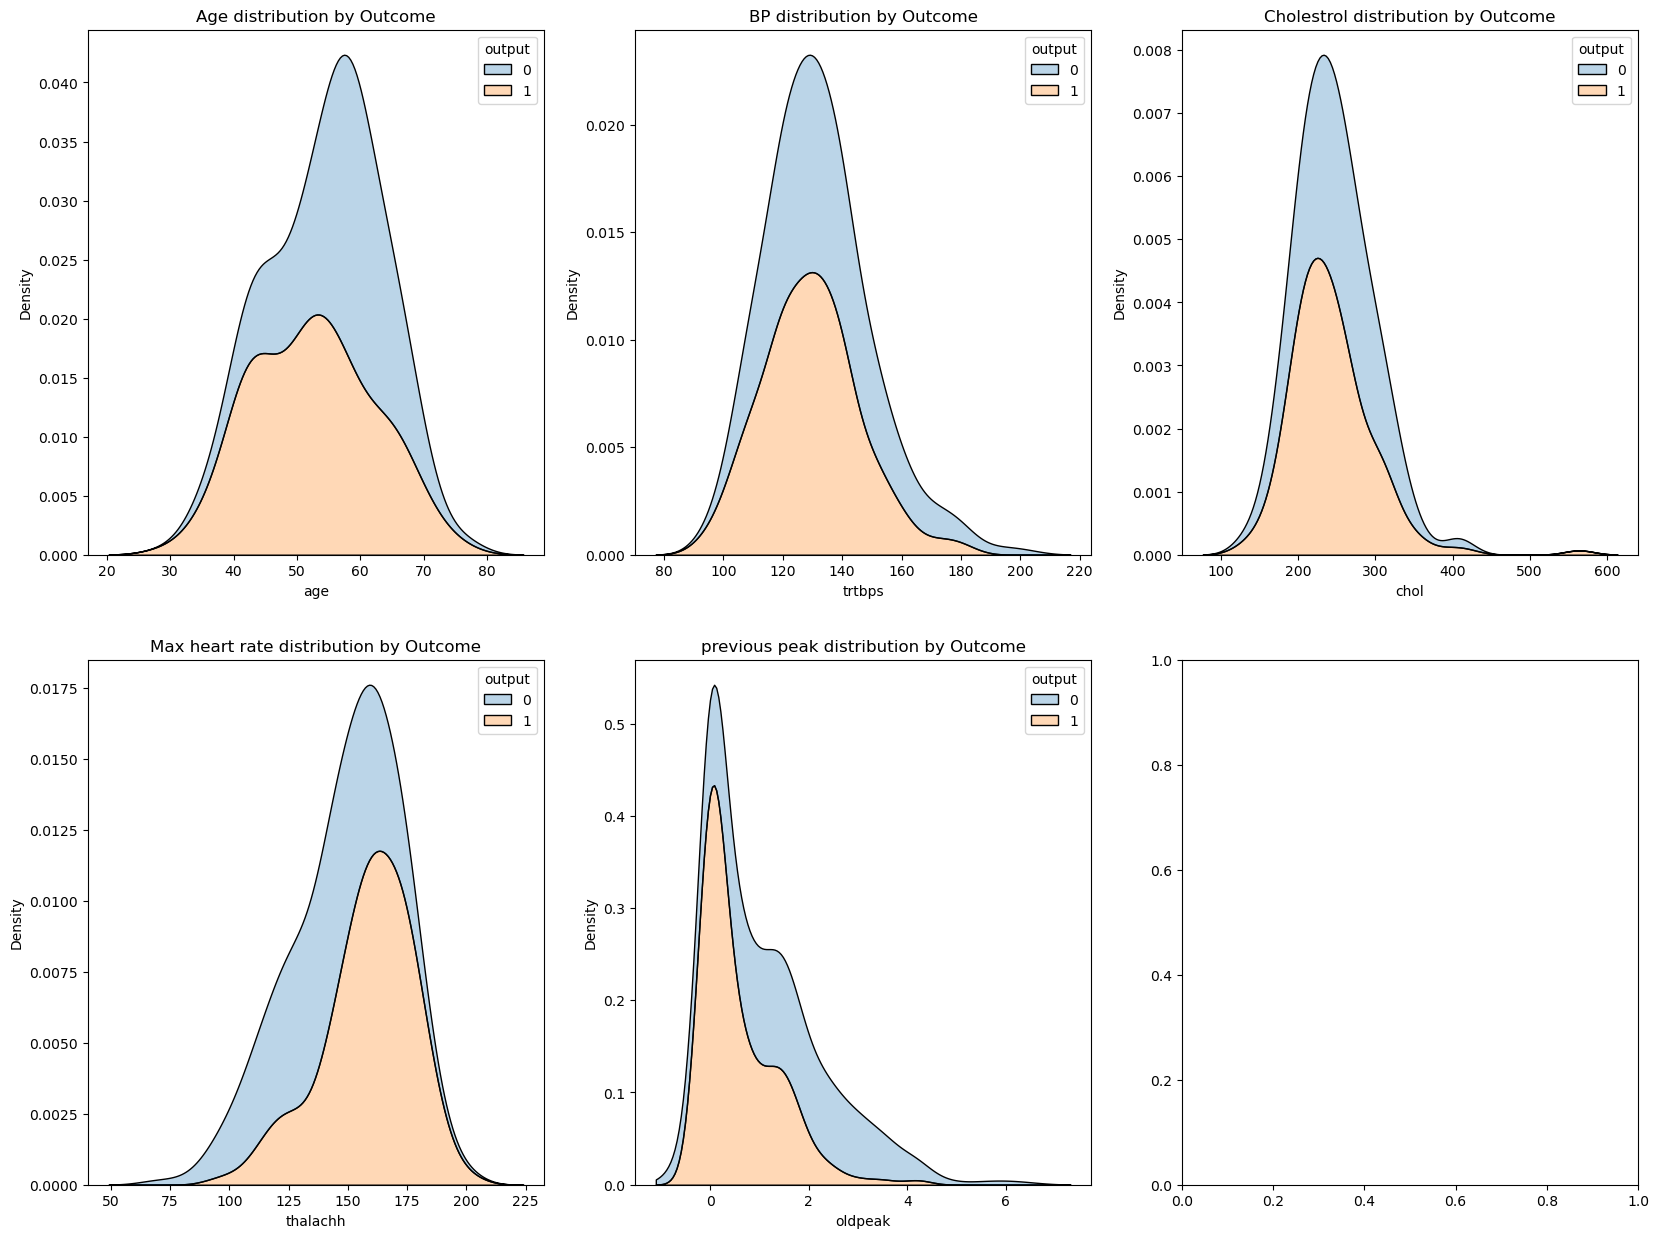

In [10]:
# class_zero = data[(data['Outcome']==0)]
# class_one = data[(data["Outcome"]==1)]

fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(20,15))

sns.kdeplot(x=data['age'], hue=data["output"], multiple="stack",ax=axes[0][0],alpha=0.3)
axes[0][0].set_title('Age distribution by Outcome')

sns.kdeplot(x=data['trtbps'], hue=data["output"], multiple="stack",ax=axes[0][1],alpha=0.3)
axes[0][1].set_title('BP distribution by Outcome')

sns.kdeplot(x=data['chol'], hue=data["output"], multiple="stack",ax=axes[0][2],alpha=0.3)
axes[0][2].set_title('Cholestrol distribution by Outcome')

sns.kdeplot(x=data['thalachh'], hue=data["output"], multiple="stack",ax=axes[1][0],alpha=0.3)
axes[1][0].set_title('Max heart rate distribution by Outcome')

sns.kdeplot(x=data['oldpeak'], hue=data["output"], multiple="stack",ax=axes[1][1],alpha=0.3)
axes[1][1].set_title('previous peak distribution by Outcome')

plt.show()

#Overall, from the graphs below we can conclude that there are more people that are NOT prone to heart attack in this
#dataset.

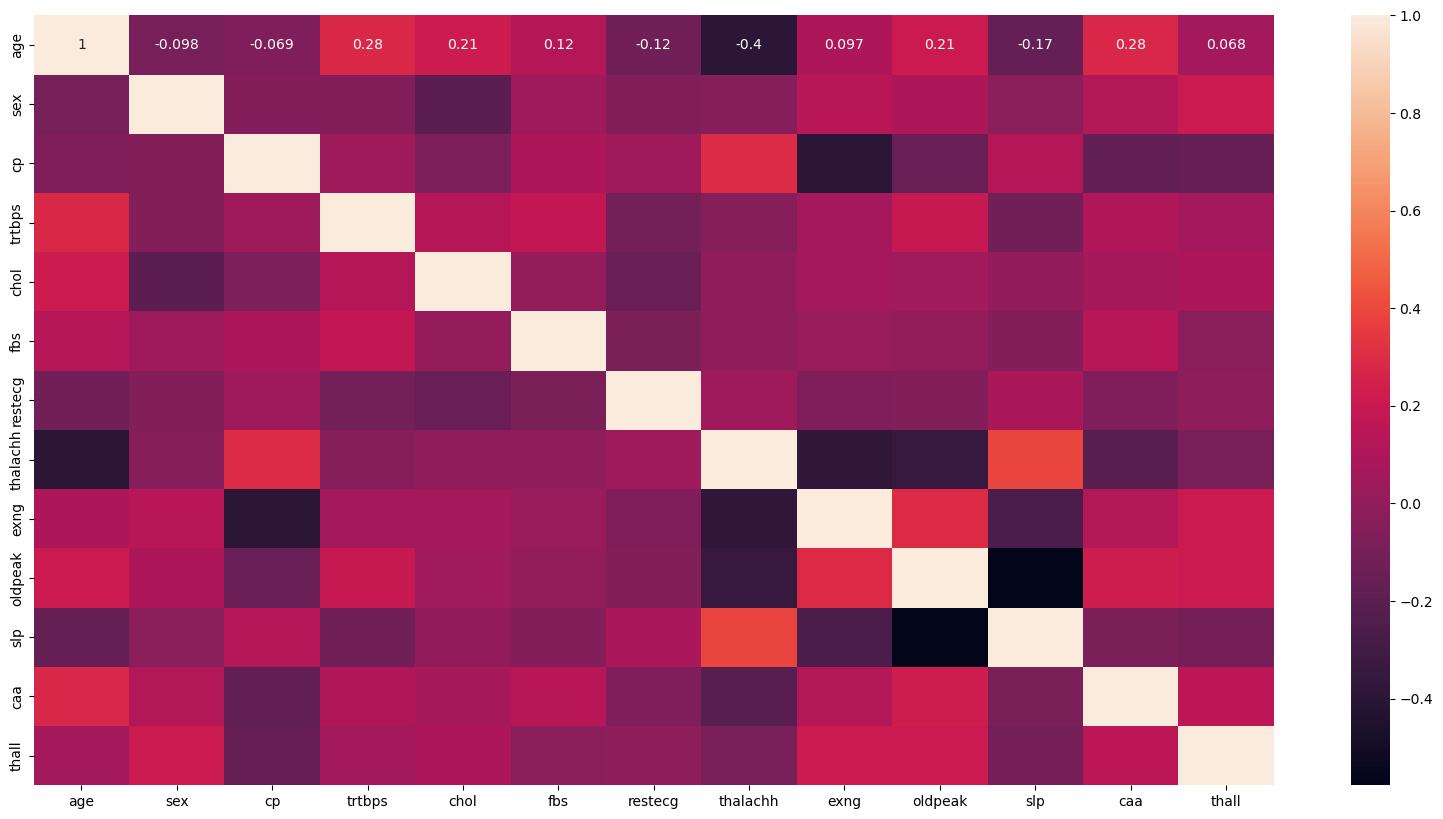

In [11]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(data.drop('output',axis=1).corr(), annot=True)
plt.show()

#Cholestrol doesn't seem to have a significan effect but I would expect it to effect the outcome in a positive pattern.

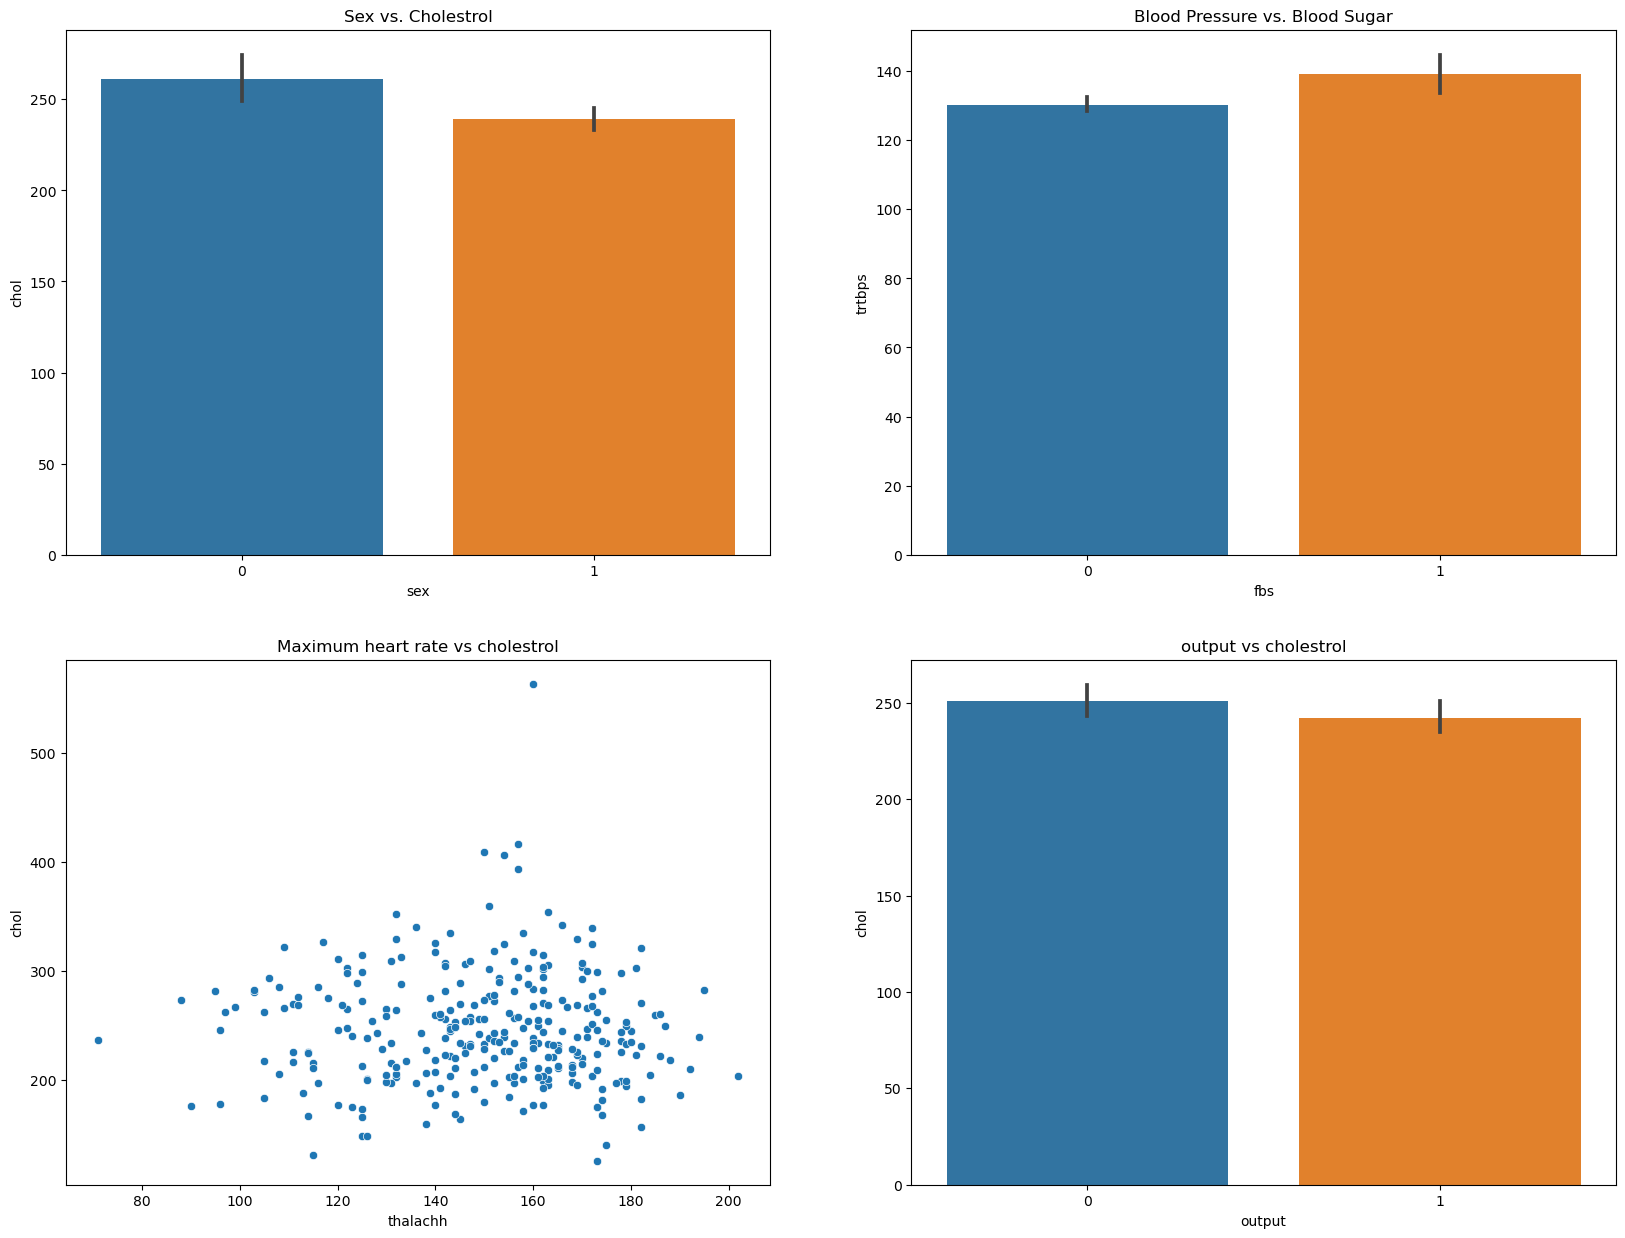

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

sns.barplot(data=data, x='sex',y='chol',ax=axes[0][0])
axes[0][0].set_title('Sex vs. Cholestrol')

sns.barplot(data=data, x='fbs',y='trtbps',ax=axes[0][1])
axes[0][1].set_title('Blood Pressure vs. Blood Sugar')

sns.scatterplot(data=data, x='thalachh',y='chol',ax=axes[1][0])
axes[1][0].set_title('Maximum heart rate vs cholestrol')

sns.barplot(data=data,x='output',y='chol',ax=axes[1][1])
axes[1][1].set_title('output vs cholestrol')

plt.show()
#the variables that I compared doesn't seem to correlate.

In [13]:
#1. We can use Logistic regression and naive bayes to solve this problem

#2. One hot encoding takes the unique elements of a column, and creates new columns for each unique element, where 
    #each respective columns will have binary values. label encoding on the other hand, assigns labels to each unique 
    #element starting from 0,1,2,...
    
#3. when there are several variables that are highly correlated, multicollinearity occurs. we need to deal with it
    #because it may give us unwanted/unneeded/noisy data, and we may want to reduce the dimensions to work with a 
    #cleaner data. we can produce a heat map to check for collinearity,  or we can also produce a pair plot.
    
#4. since it scales the whole data into a single range, we can fit the data better into the model, which would give
    #us relatively more accurate results.

#5. Logistic regression is a parametric approach, meaning it requires prior data, same goes for naive bayes too, 
    #it requires prior information.

#6. for categorical values, we can choose the mode to fill in missing values. for continuous variables, we can either
    #fill them with the median (if there are outliers) or the mean(if there are no outliers).

In [26]:
#split the data first:

from sklearn.model_selection import train_test_split

x = data.drop('output',axis=1)
y = data['output']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [27]:
#1. Logistic Regression:

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
log_predict = logmodel.predict(x_test)

In [29]:
#2. naive bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train,y_train)


GaussianNB()

In [30]:
gnb_predict = gnb.predict(x_test)

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

print("Classification report for Logistic Regression:", "\n", classification_report(y_test,log_predict),"\n")
print("Classification report for Naive Bayes:", "\n", classification_report(y_test,gnb_predict),"\n")

print("Confusion Matrix for Logistic Regression: ","\n", confusion_matrix(y_test,log_predict),"\n")
print('Confusion Matrix for Naive Bayes: ',"\n", confusion_matrix(y_test, gnb_predict),"\n")

scores_log = cross_val_score(logmodel,x,y,cv=10,scoring='accuracy')
scores_gnb = cross_val_score(gnb,x,y,cv=10,scoring='accuracy')

print(f'Cross-validation scores for Logistic Regression: {scores_log}',"\n")
print(f'\nAverage cross-validation scores for Logistic Regression: {scores_log.mean():.4f}',"\n")

print(f'Cross-validation scores for Naive Bayes: {scores_gnb}',"\n")
print(f'\nAverage cross-validation scores for Naive Bayes: {scores_gnb.mean():.4f}')

#I used Logistic Regression because it's the closest approach to linear regression, that is for predicting categorical
#variables. On the other hand, I used naive bayes because it handles overfitting well and works good with small data.
#by the accuracy score, they are close to one another. by the confusion matrix, they are close again but logistic regression 
#looks slightly better.

Classification report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.82      0.90      0.86        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91
 

Classification report for Naive Bayes: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91
 

Confusion Matrix for Logistic Regression:  
 [[31 10]
 [ 5 45]] 

Confusion Matrix for Naive Bayes:  
 [[33  8]
 [ 8 42]] 

Cross-validation scores for Logistic Regression: [0.87096774 0.77419355 0.83870968 0.9        0.9        0.86666667
 0.83333333 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite